In [ ]:
import pandas as pd 
import pandas as pd
import numpy as np
import sklearn.model_selection as ms
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
k = pd.read_csv("/content/Fabricated Pipe and Pipe Fittings PPI US .csv")
z = k.to_numpy()

In [ ]:
print(z.shape)

(208, 2)


In [ ]:
X=[]
import re
for x in range(z.shape[0]): 
  z[x][0] = int(re.sub('[^A-Za-z0-9]+','',z[x][0]))
  X.append(z[x][1])

In [ ]:
z.shape
len(X)
print(len(X))

208


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test= train_test_split(X,test_size=0.33, random_state=42)
X_Actual = np.array(X_test)

In [ ]:
X_train = np.array(X_train).reshape(-1, 1)
X_test = np.array(X_test).reshape(-1, 1)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(X_train)
test_set_scaled = sc.fit_transform(X_test)

In [ ]:
print(len(X_train),len(X_test))

139 69


In [ ]:
X_t = []
y_t = []
M_t=[]
for i in range(60, 139):
    X_t.append(training_set_scaled[i-60:i, 0])
    M_t.append(training_set_scaled[i-60:i, 0])
    y_t.append(training_set_scaled[i, 0])
X_t,M_t, y_t = np.array(X_t),np.array(M_t), np.array(y_t)

X_t = np.reshape(X_t, (X_t.shape[0], X_t.shape[1], 1))
M_t = np.reshape(M_t, (M_t.shape[0], M_t.shape[1], 1))
X_train = X_t
y_train = y_t
X_test = M_t

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [ ]:
regressor = Sequential()

regressor.add(LSTM(units = 100, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 100, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 100, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 100))
regressor.add(Dropout(0.2))

regressor.add(Dense(units = 1))

regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

regressor.fit(X_train, y_train, epochs = 100, batch_size = 64)

Epoch 1/100
79/79 [==============================] - 2s 26ms/step - loss: 0.5214
Epoch 2/100
79/79 [==============================] - 1s 7ms/step - loss: 0.2208
Epoch 3/100
79/79 [==============================] - 1s 7ms/step - loss: 0.2777
Epoch 4/100
79/79 [==============================] - 1s 7ms/step - loss: 0.0895
Epoch 5/100
79/79 [==============================] - 1s 7ms/step - loss: 0.1309
Epoch 6/100
79/79 [==============================] - 1s 7ms/step - loss: 0.1153
Epoch 7/100
79/79 [==============================] - 1s 7ms/step - loss: 0.0895
Epoch 8/100
79/79 [==============================] - 1s 7ms/step - loss: 0.0956
Epoch 9/100
79/79 [==============================] - 1s 7ms/step - loss: 0.0951
Epoch 10/100
79/79 [==============================] - 1s 7ms/step - loss: 0.0953
Epoch 11/100
79/79 [==============================] - 1s 7ms/step - loss: 0.0888
Epoch 12/100
79/79 [==============================] - 1s 7ms/step - loss: 0.0881
Epoch 13/100
79/79 [================

In [ ]:
predicted_price = regressor.predict(X_test)
predicted_price = sc.inverse_transform(predicted_price)

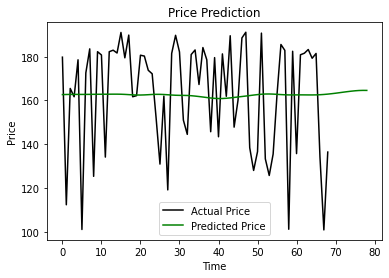

In [ ]:
plt.plot(X_Actual, color = 'black', label = 'Actual Price')
plt.plot(predicted_price, color = 'green', label = 'Predicted Price')
plt.title('Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()